# 과제#2. 직원 이직 예측

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 이직할 것으로 보이는 직원들에 대해 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 어떤 직원이 이직할지 예측해 봅시다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [71]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### 2) 데이터 로딩

In [23]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,NaN,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2
5,1,22,Travel_Frequently,Research & Development,4.0,1,Technical Degree,593,3,Male,...,No,16,3,0,4,3,3,2,2,2
6,0,24,Travel_Rarely,Research & Development,21.0,2,Technical Degree,1551,3,Male,...,No,14,2,3,2,3,3,1,1,0
7,0,34,Travel_Rarely,Research & Development,8.0,3,Medical,2068,2,Male,...,No,12,1,0,6,3,4,4,3,2
8,0,30,Travel_Rarely,Research & Development,20.0,3,Other,1084,3,Male,...,No,15,3,1,7,1,2,6,2,2
9,0,26,Travel_Rarely,Research & Development,6.0,3,Life Sciences,686,3,Female,...,Yes,13,3,1,3,2,3,3,2,2


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EmployeeNumber	|	사번	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	OverTime	|	야근여부	|	범주	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


----

## 1.데이터 탐색

## 2.데이터 전처리 

In [24]:
target = 'Attrition'

### 2.1 데이터 정리

* feature와 , target으로 분할

In [25]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 불필요한 feature 제거
    * 제거해야 할 feature를 선정하고 제거하시오. 제거 이유를 주석으로 기술합니다.

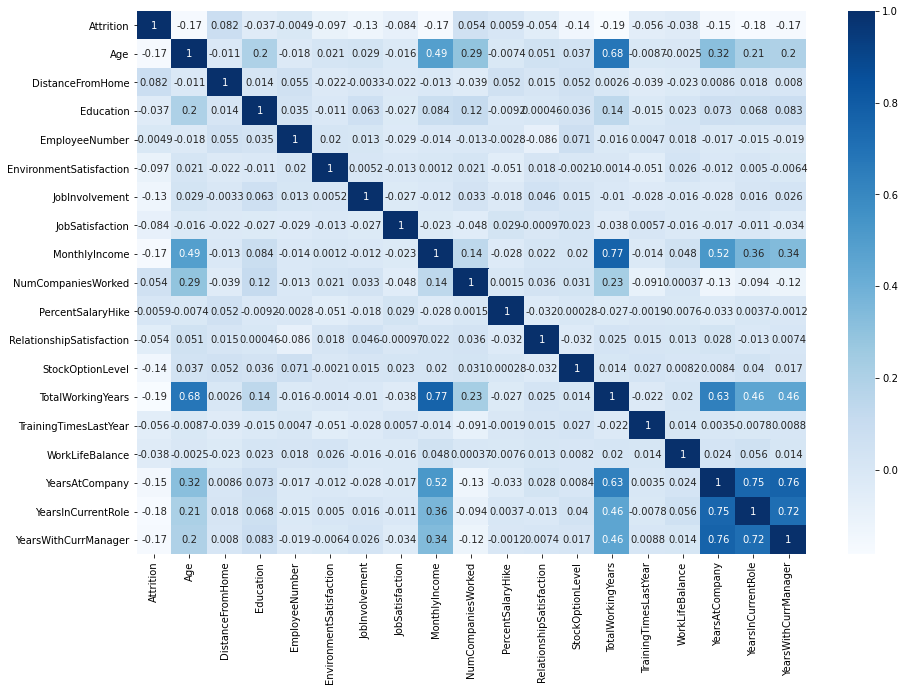

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap ='Blues')
plt.show()

In [27]:
#feature 제거
# EmployeeNumber : 사원번호로 이직율과는 관계가 없다.
# Gender : eda 분석 결과 성별은 이직율에 관계가 없다.
# TrainingTimesLastYear : 상관관계에서 낮은 수치를 보이고 있으므로 관계가 없는걸로 추정
# PercentSalaryHike : eda 분석 결과 이직율에 관계가 없다.
# Education : 상관관계에서 낮은 수치를 보이고 있으므로 관계가 없는걸로 추정
# EducationField : 전공 또한 이직율과 관계가 있다고 보기 어려움

drop_col = ['EmployeeNumber', 'Gender', 'TrainingTimesLastYear', 'PercentSalaryHike', 'Education']
x = x.drop(columns= drop_col, axis = 1)

In [33]:
x = x.drop(columns= ['EducationField'], axis = 1)

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다.

In [28]:
# DistanceFromHome , NumCompaniesWorked 에 결측치 확인
x.isna().sum()

Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
EducationField               0
EnvironmentSatisfaction      0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

In [29]:
x[['NumCompaniesWorked']].describe()
# NumCompaniesWorked는 결측치가 21개가 있다 => 이직한 적이 없는 것을 공란에 둔것으로 판단 
# 그러므로 0으로 처리
x['NumCompaniesWorked'].fillna(0 , inplace=True)

In [20]:
# 거리는 가변수화 후 KNNImputer를 이용해서 처리

In [34]:
x.isna().sum()

Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
EnvironmentSatisfaction      0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked           0
OverTime                     0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [40]:
# 범주형 데이터 가변수화
dum_cols = ['Department','BusinessTravel','EnvironmentSatisfaction','JobInvolvement',
            'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'RelationshipSatisfaction',
           'StockOptionLevel', 'WorkLifeBalance']

x = pd.get_dummies(x, columns = dum_cols ,drop_first = True)
x.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department_Research & Development,Department_Sales,...,OverTime_Yes,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,33,7.0,11691,0.0,14,13,9,7,1,0,...,0,0,0,1,0,0,0,0,0,1
1,35,18.0,9362,2.0,10,2,2,2,1,0,...,0,0,1,0,0,0,0,0,1,0
2,42,6.0,13348,9.0,18,13,7,7,1,0,...,0,1,0,0,1,0,0,0,0,1
3,46,2.0,17048,8.0,28,26,15,9,0,1,...,0,0,0,0,0,0,0,0,1,0
4,39,NaN,4127,2.0,7,2,1,2,0,1,...,0,0,0,1,1,0,0,0,1,0


In [39]:
x[['BusinessTravel']].value_counts()

BusinessTravel   
Travel_Rarely        892
Travel_Frequently    230
Non-Travel           128
dtype: int64

In [41]:
# DistanceFromHome nan조치

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(x)
# 데이터프레임으로 다시 만듭시다.
x = pd.DataFrame(imputed, columns=x.columns)
x.isna().sum()

Age                                  0
DistanceFromHome                     0
MonthlyIncome                        0
NumCompaniesWorked                   0
TotalWorkingYears                    0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsWithCurrManager                 0
Department_Research & Development    0
Department_Sales                     0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
EnvironmentSatisfaction_2            0
EnvironmentSatisfaction_3            0
EnvironmentSatisfaction_4            0
JobInvolvement_2                     0
JobInvolvement_3                     0
JobInvolvement_4                     0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Director       0
JobRole_Research Director            0
JobRole_Research Scientist           0
JobRole_Sales Executive              0
JobRole_Sales Representat

### 2.4 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.
* 추가변수에 대해서 주석으로 설명하시오.

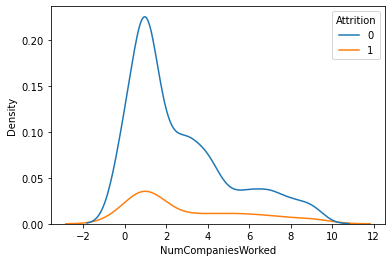

In [42]:
# 4를 기준으로 이직율이 높아지고 낮아지고 있다. => 근소하지만 feature을 좀 더 극대화 하기위해
# densityplot
sns.kdeplot(x='NumCompaniesWorked', data = data, hue = 'Attrition')
plt.show()

In [43]:
# 4를 기준으로 1과0으로 범주화 하기
def MoovingPeople(data) :
    if data['NumCompaniesWorked'] > 4:
        return 1
    else:
        return 0
x['MoovingPeople'] = x.apply(lambda data:MoovingPeople(data), axis = 1)

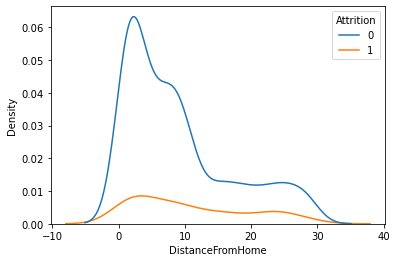

In [46]:
# 거리가 11마일 정도를 기준으로 급격하게 이직율이 변화고 있음
# 0과1로 범주화
# densityplot
sns.kdeplot(x='DistanceFromHome', data = data, hue = 'Attrition')
plt.show()

In [47]:
# 0과1로 범주화
def LongDis(data) : 
    if  data['DistanceFromHome'] > 11:
        return 1
    else : 
        return 0
x['LongDis'] = data.apply(lambda data:LongDis(data) ,axis = 1)

In [48]:
# 데이터 처리 후
# 필요없는 컬럼 버리기
col_drop = ['DistanceFromHome','NumCompaniesWorked']
x = x.drop(columns= col_drop)

In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1250 non-null   float64
 1   MonthlyIncome                      1250 non-null   float64
 2   TotalWorkingYears                  1250 non-null   float64
 3   YearsAtCompany                     1250 non-null   float64
 4   YearsInCurrentRole                 1250 non-null   float64
 5   YearsWithCurrManager               1250 non-null   float64
 6   Department_Research & Development  1250 non-null   float64
 7   Department_Sales                   1250 non-null   float64
 8   BusinessTravel_Travel_Frequently   1250 non-null   float64
 9   BusinessTravel_Travel_Rarely       1250 non-null   float64
 10  EnvironmentSatisfaction_2          1250 non-null   float64
 11  EnvironmentSatisfaction_3          1250 non-null   float

In [50]:
# 추가 된 컬럼 가변수화 진행
dum_cols =['MoovingPeople', 'LongDis']
x = pd.get_dummies(x, columns = dum_cols ,drop_first = True)
x.head()

,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,MoovingPeople_1,LongDis_1
0,33.0,11691.0,14.0,13.0,9.0,7.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
1,35.0,9362.0,10.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
2,42.0,13348.0,18.0,13.0,7.0,7.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0
3,46.0,17048.0,28.0,26.0,15.0,9.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
4,39.0,4127.0,7.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0


### 2.5 데이터 분할

* test 200건(test_size = 200), random_state = 2022
* val 200건(test_size = 200), random_state = 2022
* train 나머지.

In [52]:
# 데이터 분할(train - test)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=200,random_state=2022)

In [53]:
# 데이터 분할(train - val)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=200, random_state=2022)

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [54]:
x_train_sc = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_sc = (x_test - x_train.min()) / (x_train.max() - x_train.min())
x_val_sc = (x_val - x_train.min()) / (x_train.max() - x_train.min())

In [57]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((850, 41), (200, 41), (850,), (200,))

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* 꼭 필요한 함수만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [134]:
# 사용할 알고리즘
from sklearn.linear_model import LogisticRegression # 스케일링 한 값 넣기
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier # 스케일링 한 값 넣기
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC # 스케일링 한 값 넣기

# 성능 검증용
from sklearn.model_selection import cross_val_score

#모델 튜닝용
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 성능 평가용
from sklearn.metrics import classification_report, accuracy_score, f1_score


### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
    * 튜닝 과정에 대해서 주석으로 기술합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다. 코드 결과에 대한 분석 의견을 주석으로 기술합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

#### (1) Logistic Regression 모델링

In [61]:
# cross_val_score를 통해 선 비교
# 선언하기
model = LogisticRegression()
# 성능검증
cv_score = cross_val_score(model, x_train_sc, y_train, cv = 10)
# 결과수집
result_cv = {}
result_cv['Logistic Regression'] = cv_score.mean()

#### (2) Decision Tree 모델링

In [62]:
# cross_val_score를 통해 선 비교
# 선언하기
model = DecisionTreeClassifier(random_state=2022)
# 성능검증
cv_score = cross_val_score(model ,x_train, y_train, cv = 10)
# 결과수집
result_cv['DecisionTreeClassifier'] = cv_score.mean()

#### (3) KNN 모델링

In [63]:
# cross_val_score를 통해 선 비교
# 선언하기
model = KNeighborsClassifier()
# 성능검증
cv_score = cross_val_score(model ,x_train_sc, y_train, cv = 10)
# 결과수집
result_cv['KNN'] = cv_score.mean()

#### (4) SVM 모델링

In [64]:
# cross_val_score를 통해 선 비교
# 선언하기
model = SVC(random_state=2022)
# 성능검증
cv_score = cross_val_score(model, x_train_sc, y_train, cv = 10)
# 결과수집
result_cv['SVC'] = cv_score.mean()

#### (5) Random Forest 모델링

In [65]:
# cross_val_score를 통해 선 비교
# 선언하기
model = RandomForestClassifier(random_state=2022)
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv = 10)
# 결과수집
result_cv['RandomForestClassifier'] = cv_score.mean()

#### (6) XGB 모델링

In [72]:
# cross_val_score를 통해 선 비교
# 선언하기
model = XGBClassifier(random_state=2022, eval_metric = 'mlogloss')
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv = 10)
# 결과수집
result_cv['XGBClassifier'] = cv_score.mean()

In [73]:
# cv 값 확인
print('=' * 40)
for m_name, score in result_cv.items():
    print(m_name, score.round(3))
print('=' * 40)

Logistic Regression 0.867
DecisionTreeClassifier 0.788
KNN 0.844
SVC 0.852
RandomForestClassifier 0.854
XGBClassifier 0.855


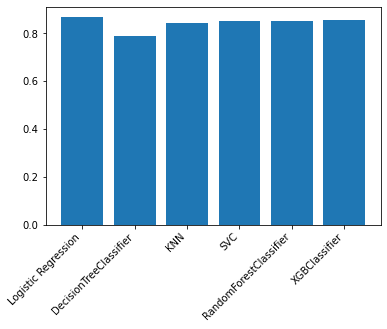

In [74]:
# 시각화
plt.bar(result_cv.keys(), result_cv.values())
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# cv 값을 비교해 본 결과
# => Logistic Regression, RandomForestClassifier, XGBClassifier, SVC 가 성능이 좋게 나옴
# 이 중 Logistic Regression, XGBClassifier, SVC 를 모델 튜닝 및 학습으로 결정

### 3.3 선정된 모델 , 모델링

#### (1) Logistic Regression 모델링

In [135]:
# Logistic Regression 학습

# 선언하기
model_lo = LogisticRegression()
# 학습
model_lo.fit(x_train_sc,y_train)
# 예측
y_pred = model_lo.predict(x_val_sc)

# 5단계: 평가하기
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
# result_ac 에 각 모델의 accuracy_score 값을 넣고 비교
result_ac ={}
result_ac['LogisticRegression'] = accuracy_score(y_val, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       176
           1       0.70      0.29      0.41        24

    accuracy                           0.90       200
   macro avg       0.81      0.64      0.68       200
weighted avg       0.89      0.90      0.88       200

0.9
0.4117647058823529


#### (2) SVC 모델링

In [145]:
# SVC 학습
model_svc = SVC()

param ={'C': np.logspace(-3,3,7),
        'gamma' :np.logspace(-2,1,4)}

m_svm_gs = GridSearchCV(model_svc, param, cv = 5, scoring = 'accuracy')


In [146]:
# 학습하기
m_svm_gs.fit(x_train_sc,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ])},
             scoring='accuracy')

In [147]:
# 결과확인
print(m_svm_gs.best_estimator_)
print(m_svm_gs.best_score_)

SVC(C=100.0, gamma=0.01)
0.8564705882352943


In [148]:
# 4단계: 예측하기
y_pred = m_svm_gs.predict(x_val_sc)
# 5단계: 평가하기
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
result_ac['SVC'] = accuracy_score(y_val, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       176
           1       0.50      0.21      0.29        24

    accuracy                           0.88       200
   macro avg       0.70      0.59      0.61       200
weighted avg       0.85      0.88      0.86       200

0.88
0.29411764705882354


#### (3) XGBClassifier 모델링

In [191]:
# XGBClassifier 튜닝 및 학습

# 선언하기
model_xgbc = XGBClassifier(random_state = 2022,eval_metric = 'mlogloss' )

param = {'max_depth':range(9,15),
        'n_estimators': range(120,170,10),
        'gamma': [0.01, 0.1, 0.5, 1,5]}

model_xgb = GridSearchCV(model_xgbc,
                    param,
                    cv = 5,
                    scoring='accuracy')

In [192]:
# 학습하기
model_xgb.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=2022, reg_alpha=None,
         

In [193]:
# 결과확인
print(model_xgb.best_estimator_)
print(model_xgb.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0.01, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=2022, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
0.8623529411764708


In [195]:
# 4단계: 예측하기
y_pred = model_xgb.predict(x_val)
# 5단계: 평가하기
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
result_ac['XGBClassifier'] = accuracy_score(y_val, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       176
           1       0.75      0.38      0.50        24

    accuracy                           0.91       200
   macro avg       0.84      0.68      0.73       200
weighted avg       0.90      0.91      0.90       200

0.91
0.5


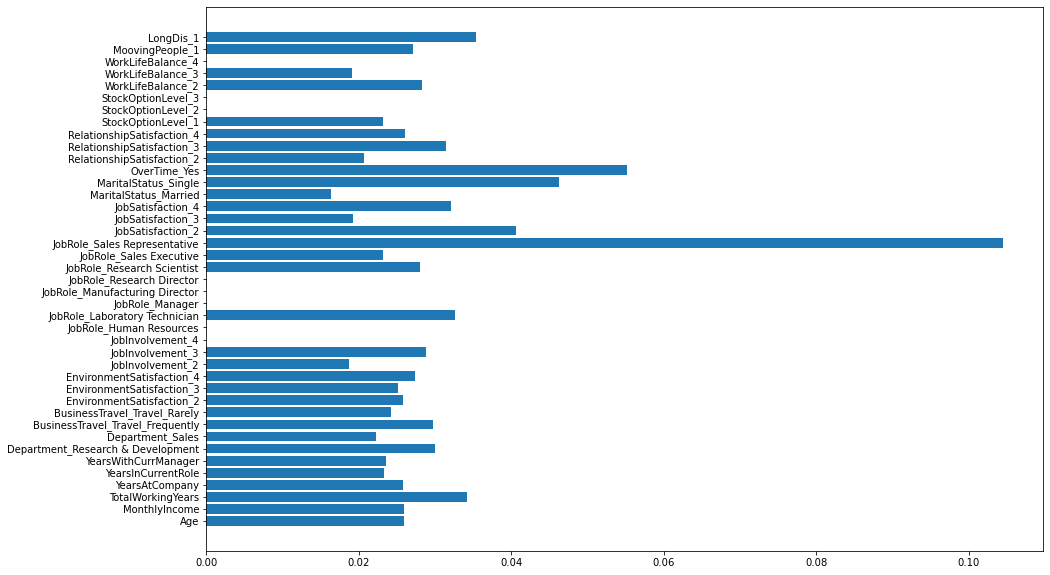

In [144]:
plt.figure(figsize=(15,10))
plt.barh(y =list(x) , width = model_xgb.best_estimator_.feature_importances_)
plt.show()

In [ ]:
# 변수 중요도를 확인 했을 때 , overTime, MaritalStatus, JobRole 세 변수가 가장 중요한 것으로 보임

## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [114]:
import tensorflow as tf
from tensorflow import keras
from keras.backend import clear_session
from keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)

In [97]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((850, 41), (200, 41), (850,), (200,))

* 모델1 

In [154]:
# 히든레이어 없이 기본적인 DL모델링

# 세션 초기화
keras.backend.clear_session()

#레이어 연결
il = keras.layers.Input(shape=(41,))
ol = keras.layers.Dense(1, activation='sigmoid')(il)

# 모델 시작과 끝 지정
model = keras.models.Model(il,ol)

#컴파일
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics='accuracy')

In [155]:
# EarlyStopping 선언
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)

In [156]:
# 모델 학습
model.fit(x_train_sc, y_train, validation_split=0.2, verbose=1, epochs=1000, callbacks=[es])

Epoch 1/1000
22/22 [==============================] - 1s 10ms/step - loss: 0.6554 - accuracy: 0.6235 - val_loss: 0.6302 - val_accuracy: 0.6941
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5984 - accuracy: 0.7147 - val_loss: 0.5820 - val_accuracy: 0.7765
Epoch 3/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5578 - accuracy: 0.7647 - val_loss: 0.5495 - val_accuracy: 0.7882
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.7912 - val_loss: 0.5238 - val_accuracy: 0.8000
Epoch 5/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.8029 - val_loss: 0.5060 - val_accuracy: 0.8000
Epoch 6/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4915 - accuracy: 0.8176 - val_loss: 0.4927 - val_accuracy: 0.8235
Epoch 7/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.8279 - val_loss: 0.4823 - val_accuracy: 0.8235
Epoch

22/22 [==============================] - 0s 3ms/step - loss: 0.3783 - accuracy: 0.8382 - val_loss: 0.3614 - val_accuracy: 0.8353
Epoch 59/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.8412 - val_loss: 0.3606 - val_accuracy: 0.8353
Epoch 60/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3763 - accuracy: 0.8426 - val_loss: 0.3594 - val_accuracy: 0.8412
Epoch 61/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8426 - val_loss: 0.3583 - val_accuracy: 0.8412
Epoch 62/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8441 - val_loss: 0.3572 - val_accuracy: 0.8412
Epoch 63/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3738 - accuracy: 0.8441 - val_loss: 0.3562 - val_accuracy: 0.8412
Epoch 64/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3732 - accuracy: 0.8441 - val_loss: 0.3551 - val_accuracy: 0.8412
Epoch 65/1000

22/22 [==============================] - 0s 3ms/step - loss: 0.3477 - accuracy: 0.8603 - val_loss: 0.3221 - val_accuracy: 0.8706
Epoch 116/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3477 - accuracy: 0.8618 - val_loss: 0.3218 - val_accuracy: 0.8706
Epoch 117/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.8618 - val_loss: 0.3215 - val_accuracy: 0.8706
Epoch 118/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8618 - val_loss: 0.3209 - val_accuracy: 0.8706
Epoch 119/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.8603 - val_loss: 0.3202 - val_accuracy: 0.8706
Epoch 120/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8618 - val_loss: 0.3200 - val_accuracy: 0.8706
Epoch 121/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3459 - accuracy: 0.8632 - val_loss: 0.3195 - val_accuracy: 0.8824
Epoch 1

Epoch 172/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3360 - accuracy: 0.8721 - val_loss: 0.3062 - val_accuracy: 0.8941
Epoch 173/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.8676 - val_loss: 0.3063 - val_accuracy: 0.8941
Epoch 174/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.8691 - val_loss: 0.3060 - val_accuracy: 0.8941
Epoch 175/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.8691 - val_loss: 0.3056 - val_accuracy: 0.8882
Epoch 176/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8691 - val_loss: 0.3054 - val_accuracy: 0.8882
Epoch 177/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3352 - accuracy: 0.8706 - val_loss: 0.3055 - val_accuracy: 0.8941
Epoch 178/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.8706 - val_loss: 0.3056 - val_accuracy:

Epoch 229/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3300 - accuracy: 0.8706 - val_loss: 0.2994 - val_accuracy: 0.8941
Epoch 230/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3299 - accuracy: 0.8721 - val_loss: 0.2997 - val_accuracy: 0.9000
Epoch 231/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.8735 - val_loss: 0.2996 - val_accuracy: 0.9000
Epoch 232/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3298 - accuracy: 0.8735 - val_loss: 0.2994 - val_accuracy: 0.9000
Epoch 233/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3296 - accuracy: 0.8735 - val_loss: 0.2994 - val_accuracy: 0.9000
Epoch 234/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3297 - accuracy: 0.8721 - val_loss: 0.2993 - val_accuracy: 0.8941
Epoch 235/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3294 - accuracy: 0.8721 - val_loss: 0.2992 - val_accuracy:

Epoch 286/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3262 - accuracy: 0.8706 - val_loss: 0.2960 - val_accuracy: 0.9000
Epoch 287/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3263 - accuracy: 0.8721 - val_loss: 0.2959 - val_accuracy: 0.9000
Epoch 288/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8706 - val_loss: 0.2961 - val_accuracy: 0.9000
Epoch 289/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.8706 - val_loss: 0.2959 - val_accuracy: 0.9000
Epoch 290/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8691 - val_loss: 0.2958 - val_accuracy: 0.9000
Epoch 291/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.8706 - val_loss: 0.2956 - val_accuracy: 0.9000
Epoch 292/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.8706 - val_loss: 0.2956 - val_accuracy:

Epoch 343/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8676 - val_loss: 0.2934 - val_accuracy: 0.9000
Epoch 344/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.8676 - val_loss: 0.2933 - val_accuracy: 0.9000
Epoch 345/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8691 - val_loss: 0.2934 - val_accuracy: 0.9000
Epoch 346/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8691 - val_loss: 0.2935 - val_accuracy: 0.9000
Epoch 347/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8676 - val_loss: 0.2939 - val_accuracy: 0.9000
Epoch 348/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8706 - val_loss: 0.2939 - val_accuracy: 0.9000
Epoch 349/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8691 - val_loss: 0.2938 - val_accuracy:

In [169]:
# 예측하기
y_pred = model.predict(x_val_sc)
preds_1d = y_pred.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) #0.5보다크면 2, 작으면 1
# 평가하기
print(classification_report(y_val,pred_class))
print(accuracy_score(y_val, pred_class))
result_ac['dl_basic'] = accuracy_score(y_val, pred_class)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       176
           1       0.67      0.25      0.36        24

    accuracy                           0.90       200
   macro avg       0.79      0.62      0.65       200
weighted avg       0.88      0.90      0.87       200

0.895


* 모델2

In [158]:
# 히든 레이어 3개추가

In [159]:
# 세션 초기화
keras.backend.clear_session()

#레이어 연결
il =Input(shape=(41,))
hl = Dense(256, activation = 'relu')(il)
hl = Dense(64, activation = 'relu')(hl)
hl = Dense(64, activation = 'relu')(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 모델 시작과 끝 지정
model_hl = keras.models.Model(il,ol)

#컴파일
model_hl.compile(loss = 'binary_crossentropy', optimizer='adam', metrics='accuracy')

In [160]:
# 모델 학습
model_hl.fit(x_train_sc, y_train, validation_split=0.2, verbose=1, epochs=1000, callbacks=[es])

Epoch 1/1000
22/22 [==============================] - 1s 11ms/step - loss: 0.5018 - accuracy: 0.8103 - val_loss: 0.4486 - val_accuracy: 0.8235
Epoch 2/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4196 - accuracy: 0.8309 - val_loss: 0.3963 - val_accuracy: 0.8235
Epoch 3/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3858 - accuracy: 0.8309 - val_loss: 0.3678 - val_accuracy: 0.8471
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.3589 - accuracy: 0.8559 - val_loss: 0.3207 - val_accuracy: 0.8765
Epoch 5/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.8691 - val_loss: 0.2911 - val_accuracy: 0.8882
Epoch 6/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3123 - accuracy: 0.8765 - val_loss: 0.3010 - val_accuracy: 0.8882
Epoch 7/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.2820 - accuracy: 0.8985 - val_loss: 0.2851 - val_accuracy: 0.9059
Epoch

In [161]:
# 예측하기
y_pred = model_hl.predict(x_val_sc)
preds_1d = y_pred.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) #0.5보다크면 2, 작으면 1
# 평가하기
print(classification_report(y_val,pred_class))
print(accuracy_score(y_val, pred_class))
result_ac['dl_hl_3'] = accuracy_score(y_val, pred_class)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       176
           1       0.60      0.25      0.35        24

    accuracy                           0.89       200
   macro avg       0.75      0.61      0.65       200
weighted avg       0.87      0.89      0.87       200

0.89


* 모델3

In [162]:
# 히든레이어 6개추가

In [163]:
# 세션 초기화
keras.backend.clear_session()

#레이어 연결
il =Input(shape=(41,))
hl = Dense(512, activation = 'relu')(il)
hl = Dense(256, activation = 'relu')(hl)
hl = Dense(256, activation = 'relu')(hl)
hl = Dense(64, activation = 'relu')(hl)
hl = Dense(64, activation = 'relu')(hl)
hl = Dense(32, activation = 'relu')(hl)
hl = Dense(32, activation = 'relu')(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 모델 시작과 끝 지정
model_hl_6 = keras.models.Model(il,ol)

#컴파일
model_hl_6.compile(loss = 'binary_crossentropy', optimizer='adam', metrics='accuracy')

In [164]:
# 모델 학습
model_hl_6.fit(x_train_sc, y_train, validation_split=0.2, verbose=1, epochs=1000, callbacks=[es])

Epoch 1/1000
22/22 [==============================] - 1s 15ms/step - loss: 0.4844 - accuracy: 0.8162 - val_loss: 0.4261 - val_accuracy: 0.8235
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.3982 - accuracy: 0.8309 - val_loss: 0.3539 - val_accuracy: 0.8235
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.3537 - accuracy: 0.8309 - val_loss: 0.3233 - val_accuracy: 0.8235
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.3177 - accuracy: 0.8603 - val_loss: 0.3096 - val_accuracy: 0.9000
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.2818 - accuracy: 0.8941 - val_loss: 0.3406 - val_accuracy: 0.8941
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.2416 - accuracy: 0.8985 - val_loss: 0.2942 - val_accuracy: 0.8824
Epoch 7/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.2018 - accuracy: 0.9162 - val_loss: 0.3291 - val_accuracy: 0.8824
Epoch

In [165]:
# 예측하기
y_pred = model_hl_6.predict(x_val_sc)
preds_1d = y_pred.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) #0.5보다크면 2, 작으면 1
# 평가하기
print(classification_report(y_val,pred_class))
print(accuracy_score(y_val, pred_class))
result_ac['dl_hl_6'] = accuracy_score(y_val, pred_class)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       176
           1       0.42      0.42      0.42        24

    accuracy                           0.86       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.86      0.86      0.86       200

0.86


### 4.3 학습 및 최적화
* 다양한 학습조건으로 모델링 수행후 성능을 비교해 봅시다.


In [149]:
# test set으로 예측
# Logistic Regression
y_pred = model_lo.predict(x_test_sc)
# test_ac 에 각 모델의 accuracy_score 값을 넣고 비교
test_ac ={}
test_ac['LogisticRegression'] = accuracy_score(y_test, y_pred)

In [150]:
# svm
y_pred = m_svm_gs.predict(x_test_sc)
test_ac['SVC'] = accuracy_score(y_test, y_pred)

In [196]:
# xgb 
y_pred = model_xgb.predict(x_test)
test_ac['xgb'] = accuracy_score(y_test, y_pred)

In [172]:
# basci_dl
y_pred = model.predict(x_test_sc)
preds_1d = y_pred.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) #0.5보다크면 2, 작으면 1
test_ac['dl_basic'] = accuracy_score(y_test, pred_class)

In [173]:
# dl_hl_3
y_pred = model_hl.predict(x_test_sc)
preds_1d = y_pred.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) #0.5보다크면 2, 작으면 1
test_ac['dl_hl_3'] = accuracy_score(y_test, pred_class)

In [174]:
# dl_hl_6
y_pred = model_hl_6.predict(x_test_sc)
preds_1d = y_pred.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) #0.5보다크면 2, 작으면 1
test_ac['dl_hl_6'] = accuracy_score(y_test, pred_class)

## 5.성능 비교
* 알고리즘별 선정된 모델이 최소 6개 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
    * 평가지표 선정 이유도 주석으로 기술하시오.
* 최종 모델을 선정하게 된 근거를 주석으로 기술하시오.

### 5.1 평가지표 결정

* 어떤 지표로 성능을 비교할지 결정합니다.
* 결정 이유를 기술합니다.

In [ ]:
# accuracy 지표로 결정 => True를 True라고 옳게 예측한 경우 ,False를 False라고 예측한 경우 
# 두개의 경우 모두 중요하기 때문에 정확도를 지표로 결정
# 가장 직관적인 모델의 성능을 나타낼 수 있는 평가 지표라고 생각합니다.
#  classification_report로 봤을 때 다른 지표들은 너무 불규칙적임 그러므로 전체적인 지표인 accuracy

### 5.2 성능 비교

In [197]:
# 검증용 accuracy 값 확인 및 비교
print('=' * 40)
for m_name, score in result_ac.items():
    print(m_name, score.round(3))
print('=' * 40)

LogisticRegression 0.9
SVC 0.88
XGBClassifier 0.91
dl_basic 0.895
dl_hl_3 0.89
dl_hl_6 0.86


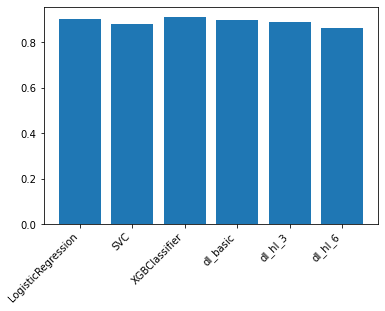

In [198]:
# 시각화
plt.bar(result_ac.keys(), result_ac.values())
plt.xticks(rotation=45, ha='right')
plt.show()

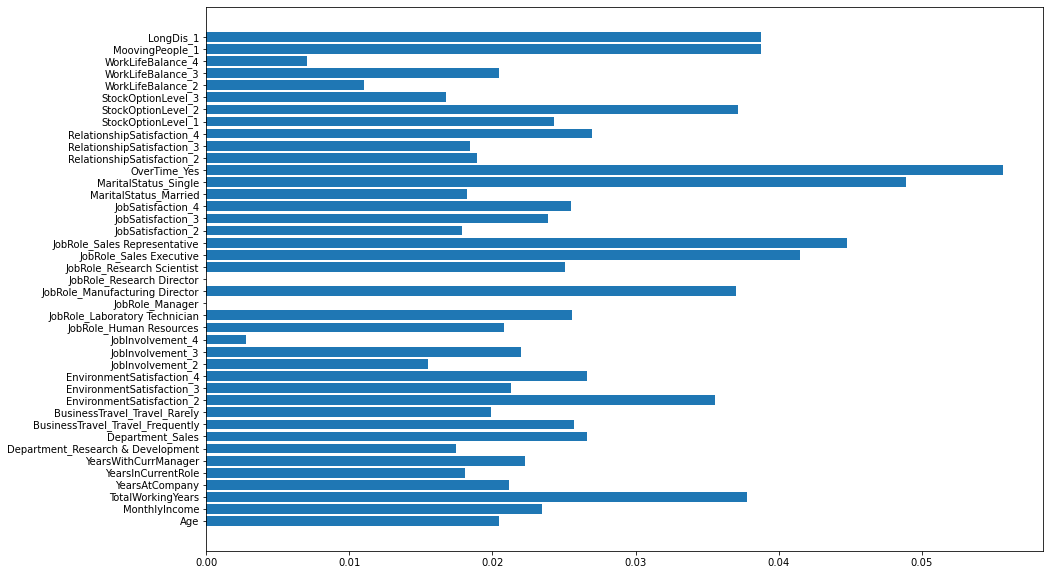

In [199]:
plt.figure(figsize=(15,10))
plt.barh(y =list(x) , width = model_xgb.best_estimator_.feature_importances_)
plt.show()

In [ ]:
# 테스트 accuracy 값 확인 및 비교

In [200]:
print('=' * 40)
for m_name, score in test_ac.items():
    print(m_name, score.round(3))
print('=' * 40)

LogisticRegression 0.89
SVC 0.885
xgb 0.89
dl_basic 0.88
dl_hl_3 0.88
dl_hl_6 0.875


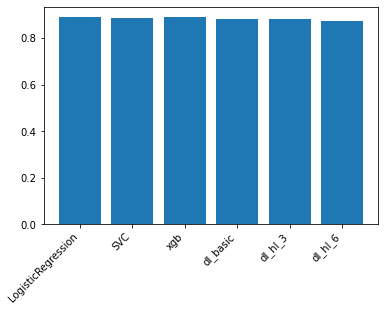

In [201]:
# 시각화
plt.bar(test_ac.keys(), test_ac.values())
plt.xticks(rotation=45, ha='right')
plt.show()

* 검증용 accuracy값 에서는 xgb가 0.91로 가장 성능이 좋게 나왔지만
* 테스트 accuracy값 에서는 0.89로 성능이 줄었고 LogisticRegression과 비슷한 성능을 보이고 있다
* 튜닝 할 때 과적합으로 인한 성능 저하로 생각된다.
* 하지만 결론은 검증,테스트 두 테스트에서 성능이 가장 좋은 것으로 나왔기 때문에 최적의 모델이라고 생각한다.